## Analyse the performance curve

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import ipdb

In [30]:
models = ['hred', 'hred-cf', 'GatedGCN']
dataset_name = 'ubuntu'
paths = [f'./processed/{dataset_name}/{i}/conclusion.txt' for i in models]
size = 30

In [31]:
def read_file(path, size=20):
    with open(path) as f:
        bleu4, dist1, dist2, acc, macro, micro = [], [], [], [], [], []
        embedding_average = []
        for line in f.readlines():
            line = line.strip()
            if 'BLEU-4' in line:
                bleu4.append(float(line.replace('BLEU-4: ', '')))
            elif 'Embedding Average' in line:
                embedding_average.append(float(line.replace('Embedding Average: ', '')))
            elif 'Decision Acc' in line:
                acc.append(float(line.replace('Decision Acc: ', '')))
            elif 'F1' in line:
                ma, mi = line.split(',')
                macro.append(float(ma.replace('Decision macro-F1: ', '')))
                micro.append(float(mi.replace('Decision micro-F1: ', '')))
            elif 'Distinct' in line:
                distinct1, distinct2 = line.split(';')
                dist1.append(float(distinct1.replace('Distinct-1: ', '').strip()))
                dist2.append(float(distinct2.replace('Distinct-2: ', '').strip()))

    assert len(bleu4) == size, f'{len(bleu4)}'
    assert len(embedding_average) == size, f'{len(embedding_average)}'
    assert len(dist1) == size, f'{len(dist1)}'
    assert len(dist2) == size, f'{len(dist2)}'
    
    return (bleu4, embedding_average, dist1, dist2, acc, macro)

In [32]:
def draw_curve(ax1, ax2, ax3, ax4, ax5, ax6,
               bleu4, embedding_average, dist1, dist2, acc, macro, m):
    x = np.arange(1, size + 1)
    
    ax1.plot(x, bleu4, label=m)
    ax1.legend()
    ax1.set_title('BLEU')
    
    ax2.plot(x, embedding_average, label=m)
    ax2.legend()
    ax2.set_title('Embedding Average')
    
    ax3.plot(x, dist1, label=m)
    ax3.legend()
    ax3.set_title('Distinct-1')
    
    ax4.plot(x, dist2, label=m)
    ax4.legend()
    ax4.set_title('Distinct-2')
    
    if acc:
        ax5.plot(x, acc, label=m)
        ax5.legend()
    ax5.set_title('Acc')
    
    if macro:
        ax6.plot(x, macro, label=m)
        ax6.legend()
    ax6.set_title('Macro-F1')

In [33]:
def meta_data(bar, data, min_threshold=0, max_threshold=30):
    try:
        print(f'{bar}: Max data {np.max(data[min_threshold:max_threshold])}, epoch: {1 + np.argmax(data[min_threshold:max_threshold])}')
    except:
        return 

In [36]:
dataset = []
for m, path in zip(models, paths):
    print(f'========== {m} : {path} ==========')
    data = read_file(path, size=size)
    if data:
        dataset.append(data)
        meta_data('BLEU-4', data[0], 
                  min_threshold=0, max_threshold=20)
        meta_data('Embedding Average', data[1], 
                  min_threshold=0, max_threshold=20)
        meta_data('Dist-1', data[2], 
                  min_threshold=0, max_threshold=20)
        meta_data('Dist-2', data[3], 
                  min_threshold=0, max_threshold=20)
        meta_data('Acc', data[4], 
                  min_threshold=0, max_threshold=20)
        meta_data('Macro-F1', data[5], 
                  min_threshold=0, max_threshold=20)

========== hred : ./processed/ubuntu/hred/conclusion.txt ==========
BLEU-4: Max data 0.0905, epoch: 1
Embedding Average: Max data 0.7929, epoch: 1
Dist-1: Max data 0.0935, epoch: 7
Dist-2: Max data 0.3873, epoch: 7
========== hred-cf : ./processed/ubuntu/hred-cf/conclusion.txt ==========
BLEU-4: Max data 0.149, epoch: 17
Embedding Average: Max data 0.7928, epoch: 1
Dist-1: Max data 0.0367, epoch: 20
Dist-2: Max data 0.2478, epoch: 20
Acc: Max data 0.6737629459148446, epoch: 9
Macro-F1: Max data 0.6740917197685888, epoch: 2
========== GatedGCN : ./processed/ubuntu/GatedGCN/conclusion.txt ==========
BLEU-4: Max data 0.1554, epoch: 15
Embedding Average: Max data 0.7845, epoch: 10
Dist-1: Max data 0.0559, epoch: 20
Dist-2: Max data 0.2888, epoch: 20
Acc: Max data 0.7245876486382815, epoch: 20
Macro-F1: Max data 0.7173638629848826, epoch: 3


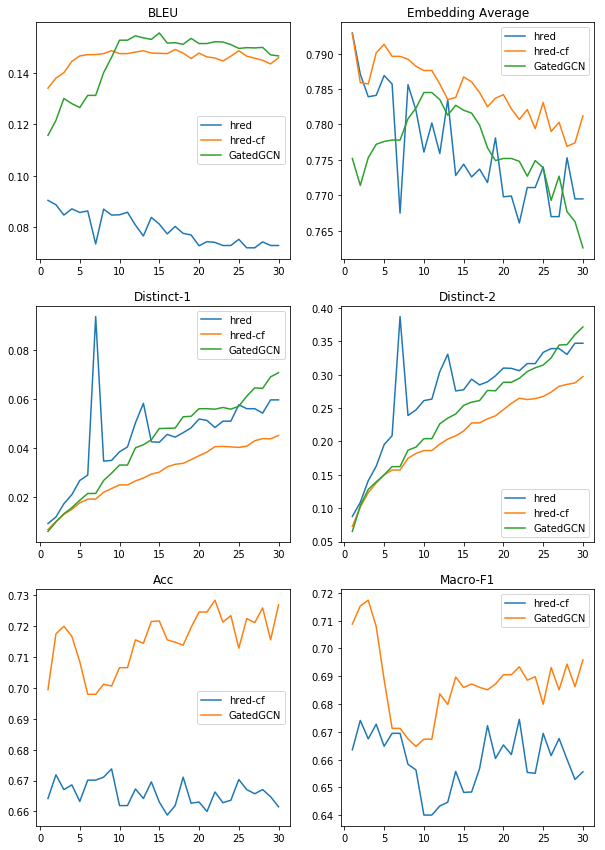

In [37]:
plt.figure(figsize=(10, 20))
sub = [plt.subplot(4, 2, 1), plt.subplot(4, 2, 2), plt.subplot(4, 2, 3),
       plt.subplot(4, 2, 4), plt.subplot(4, 2, 5), plt.subplot(4, 2, 6)]

for d, m in zip(dataset, models):
    draw_curve(*sub, *d, m)
    
plt.savefig(f'./img/{dataset_name}.png')